In [127]:
library(cluster)
library(plotly)
library(GGally)
library(dendextend)
library(palmerpenguins)
library(dplyr)
library(cluster)
library(caret)
library(mclust)

Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



In [63]:
penguins <- na.omit(penguins)
logpenguins <- log(penguins[,3:6])
logpenguins$species <- penguins$species
summary(penguins)

      species          island    bill_length_mm  bill_depth_mm  
 Adelie   :146   Biscoe   :163   Min.   :32.10   Min.   :13.10  
 Chinstrap: 68   Dream    :123   1st Qu.:39.50   1st Qu.:15.60  
 Gentoo   :119   Torgersen: 47   Median :44.50   Median :17.30  
                                 Mean   :43.99   Mean   :17.16  
                                 3rd Qu.:48.60   3rd Qu.:18.70  
                                 Max.   :59.60   Max.   :21.50  
 flipper_length_mm  body_mass_g       sex           year     
 Min.   :172       Min.   :2700   female:165   Min.   :2007  
 1st Qu.:190       1st Qu.:3550   male  :168   1st Qu.:2007  
 Median :197       Median :4050                Median :2008  
 Mean   :201       Mean   :4207                Mean   :2008  
 3rd Qu.:213       3rd Qu.:4775                3rd Qu.:2009  
 Max.   :231       Max.   :6300                Max.   :2009  

In [79]:
logpenguins %>% 
group_by(species) %>% 
summarize(
    mean(bill_length_mm), 
    mean(bill_depth_mm), 
    mean(flipper_length_mm),
    mean(body_mass_g)
)

species,mean(bill_length_mm),mean(bill_depth_mm),mean(flipper_length_mm),mean(body_mass_g)
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Adelie,3.656704,2.907303,5.246980,8.210187
Chinstrap,3.886095,2.911590,5.276559,8.219760
Gentoo,3.860086,2.705700,5.380528,8.530666


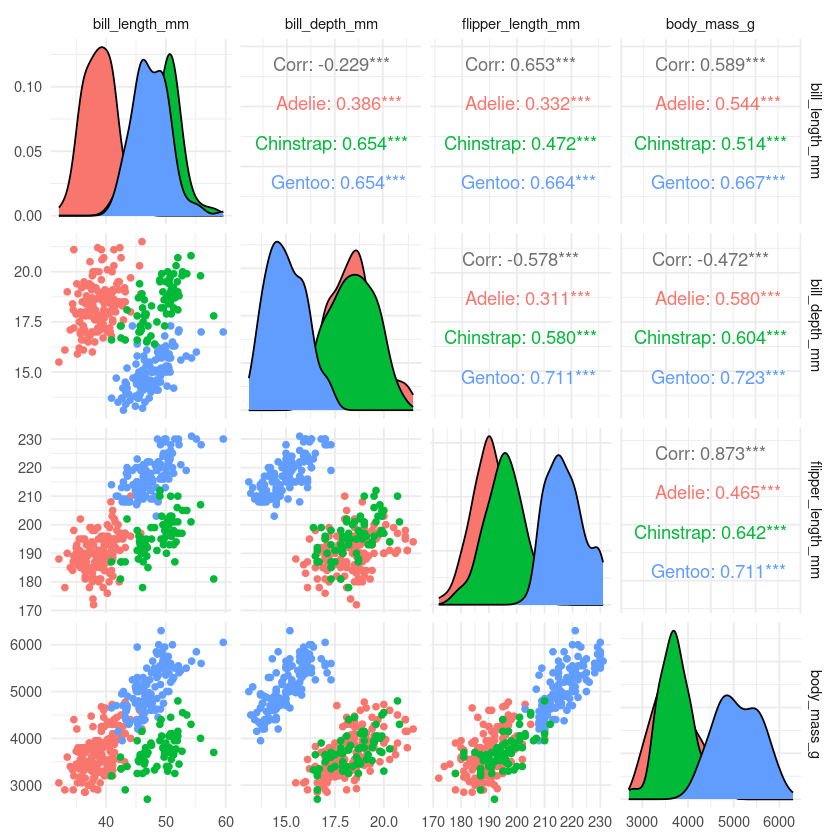

In [66]:
p <- ggpairs(penguins, columns = 3:6, aes(color = species)) + theme_minimal()
p

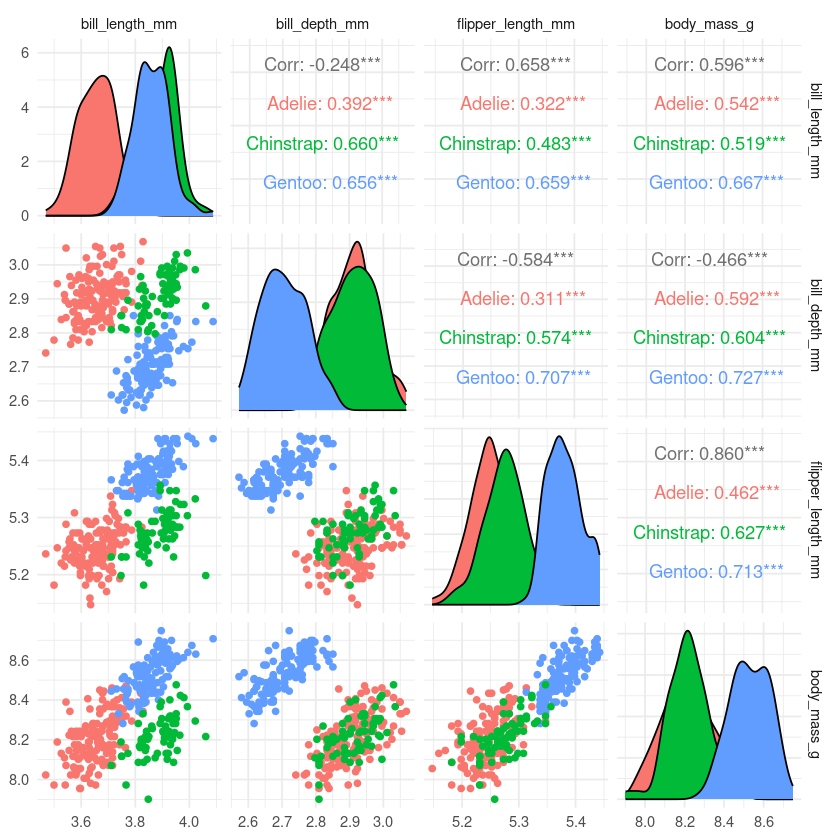

In [67]:
p <- ggpairs(logpenguins, columns = 1:4, aes(color = species)) + theme_minimal()
p

# Applying the agglomerative clustering algorithm 

In [68]:
ac <- agnes(logpenguins[, 1:4], method = "complete")

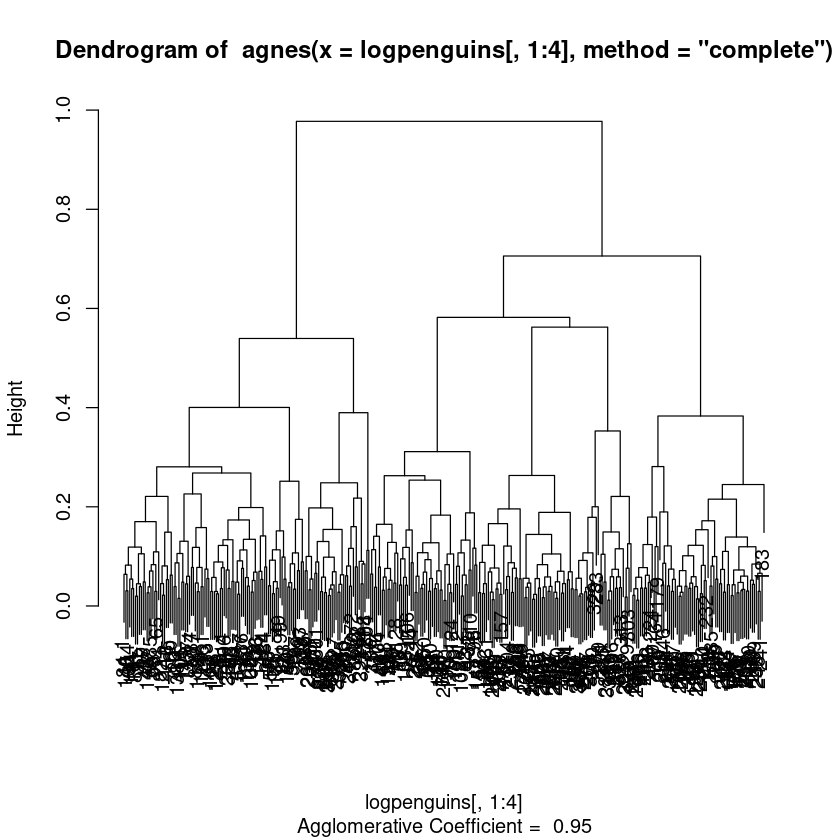

In [69]:
plot(ac, which.plots = 2)

In [118]:
labels <- cutree(ac, h = 0.6)

# There is room for improvement in the labelling

In [119]:
labels <- labels %>% as.vector() %>% as.character()

In [120]:
labels <- replace(labels, labels == "1", "Adelie")
labels <- replace(labels, labels == "3", "Gentoo")
labels <- replace(labels, labels == "2", "Chinstrap") %>% as.factor()
as.numeric(labels)

[1] 1 1 1 1 1 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 1 1 2 1 2
 [38] 1 2 1 2 1 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 [75] 1 2 1 2 1 1 1 1 2 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 2 2 1
[112] 2 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 2 3
[149] 2 3 3 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 3 2 2 3 2 3 3 2 3 3 2 3 3 3 3 2 3 2 3
[186] 2 3 2 3 3 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 3 2 3 2 3 3 3 2 3 2 3
[223] 2 3 2 3 2 3 2 3 2 3 2 3 3 3 2 3 2 3 3 2 2 3 3 3 3 3 3 2 3 2 3 3 3 2 3 2 3
[260] 3 2 2 3 3 3 1 2 2 1 2 1 1 1 2 2 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1
[297] 2 1 2 2 1 1 2 1 2 2 1 2 1 1 2 1 2 1 1 1 2 1 2 1 1 1 2 2 1 2 1 1 2 1 1 2 2

In [121]:
confusionMatrix(labels, reference = logpenguins$species)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie        91        37      0
  Chinstrap     55        31     50
  Gentoo         0         0     69

Overall Statistics
                                          
               Accuracy : 0.5736          
                 95% CI : (0.5185, 0.6273)
    No Information Rate : 0.4384          
    P-Value [Acc > NIR] : 5.021e-07       
                                          
                  Kappa : 0.3673          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 0.6233          0.45588        0.5798
Specificity                 0.8021          0.60377        1.0000
Pos Pred Value              0.7109          0.22794        1.0000
Neg Pred Value              0.7317          0.81218        0.8106
Prevalence                  0.4384        

# k-means clustering

In [76]:
kc <- clara(logpenguins[,1:4], k=3)

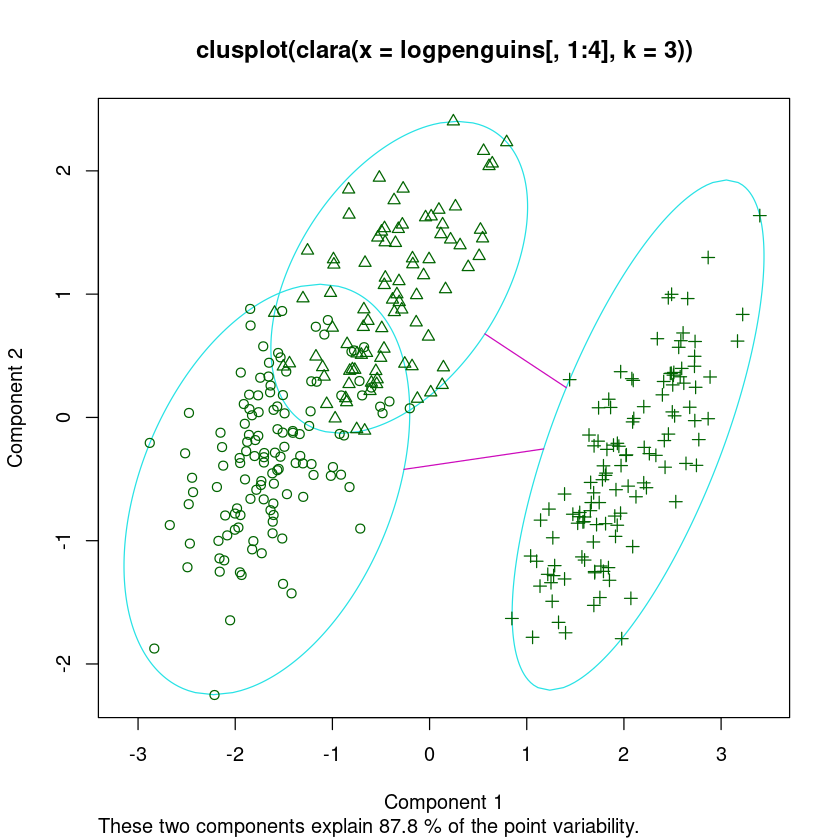

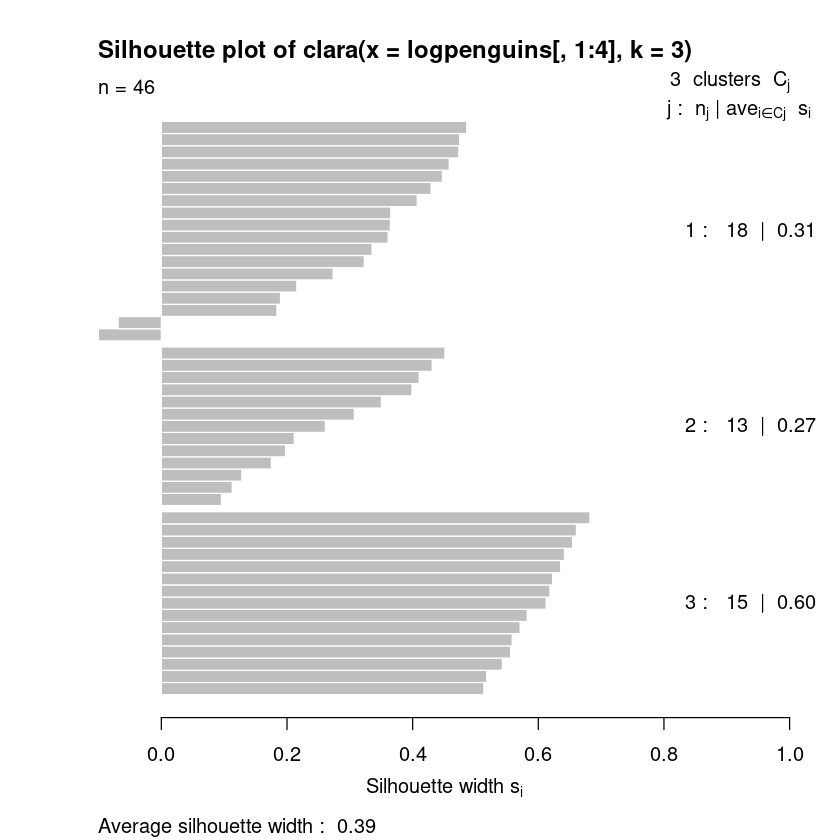

In [77]:
plot(kc)

In [78]:
summary(kc)

Object of class 'clara' from call:
 clara(x = logpenguins[, 1:4], k = 3) 
Medoids:
     bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
[1,]       3.678829      2.873565          5.225747    8.160518
[2,]       3.824284      2.939162          5.283204    8.330864
[3,]       3.837299      2.747271          5.398163    8.517193
Objective function:	  0.1371039 
Numerical information per cluster:
     size  max_diss   av_diss isolation
[1,]  125 0.3179553 0.1309469  1.322760
[2,]   89 0.3069416 0.1471791  1.276940
[3,]  119 0.3286240 0.1360360  1.127663
Average silhouette width per cluster:
[1] 0.3122142 0.2716612 0.5980334
Average silhouette width of best sample: 0.3939555 

Best sample:
 [1]   5   6  12  20  23  31  38  45  55  68  72  88  91  92  95 103 104 116 132
[20] 144 177 191 200 201 215 216 224 229 231 241 248 254 255 256 265 275 278 284
[39] 287 289 293 298 301 304 307 332
Clustering vector:
  [1] 1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1

In [125]:
labels <- kc$clustering

labels <- labels %>% as.vector() %>% as.character()
labels <- replace(labels, labels == "1", "Adelie")
labels <- replace(labels, labels == "3", "Gentoo")
labels <- replace(labels, labels == "2", "Chinstrap") %>% as.factor()
as.numeric(labels)

[1] 1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1
 [38] 1 2 1 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 1 1 2
 [75] 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 1 2 1 2 1 2 2 2 1
[112] 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[260] 3 3 3 3 3 3 1 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 1 2 1 2 2 2 2 2 1
[297] 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 2 2 2 2 1 1 2 1 2 2 2

In [126]:
confusionMatrix(labels, reference = logpenguins$species)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie       105        20      0
  Chinstrap     41        48      0
  Gentoo         0         0    119

Overall Statistics
                                         
               Accuracy : 0.8168         
                 95% CI : (0.771, 0.8569)
    No Information Rate : 0.4384         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7195         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 0.7192           0.7059        1.0000
Specificity                 0.8930           0.8453        1.0000
Pos Pred Value              0.8400           0.5393        1.0000
Neg Pred Value              0.8029           0.9180        1.0000
Prevalence                  0.4384           0.2042

# Gaussian mixture models

In [129]:
model <- Mclust(logpenguins[, 1:4], G = 3)

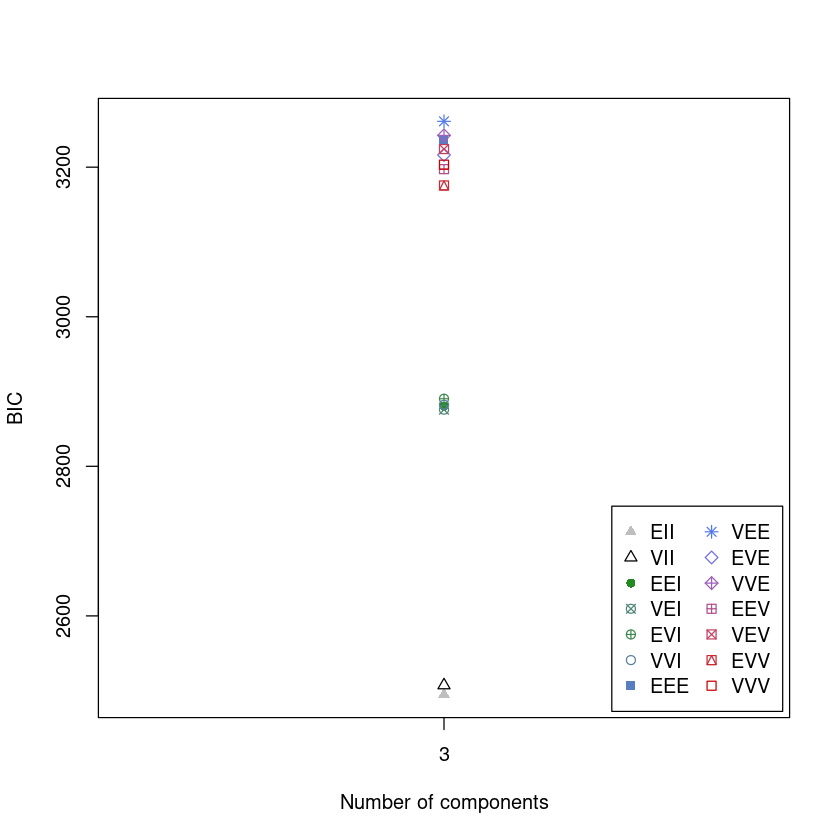

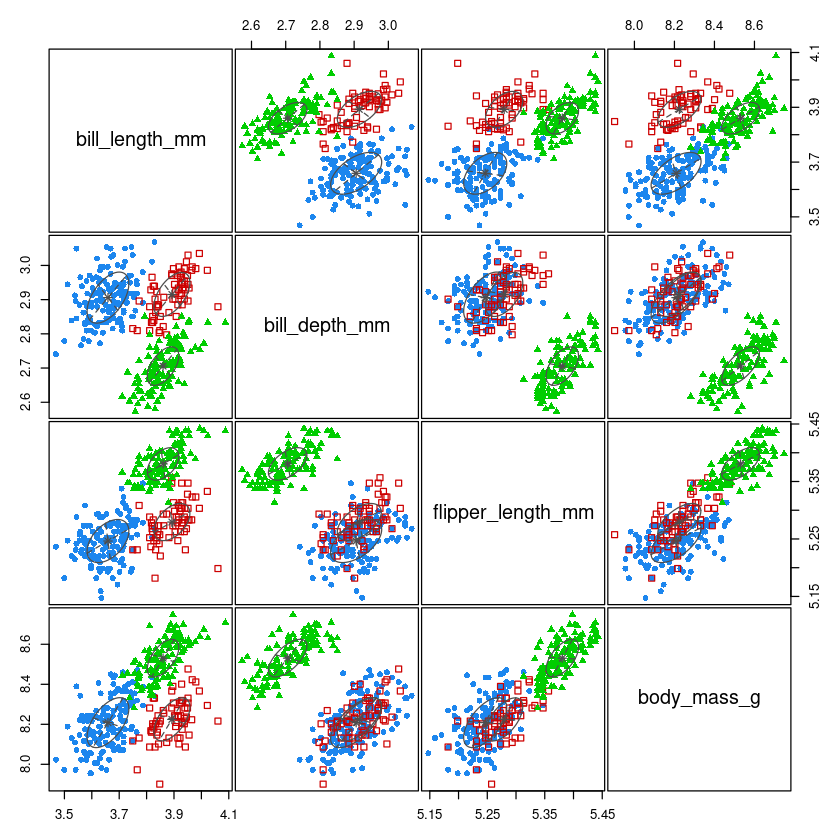

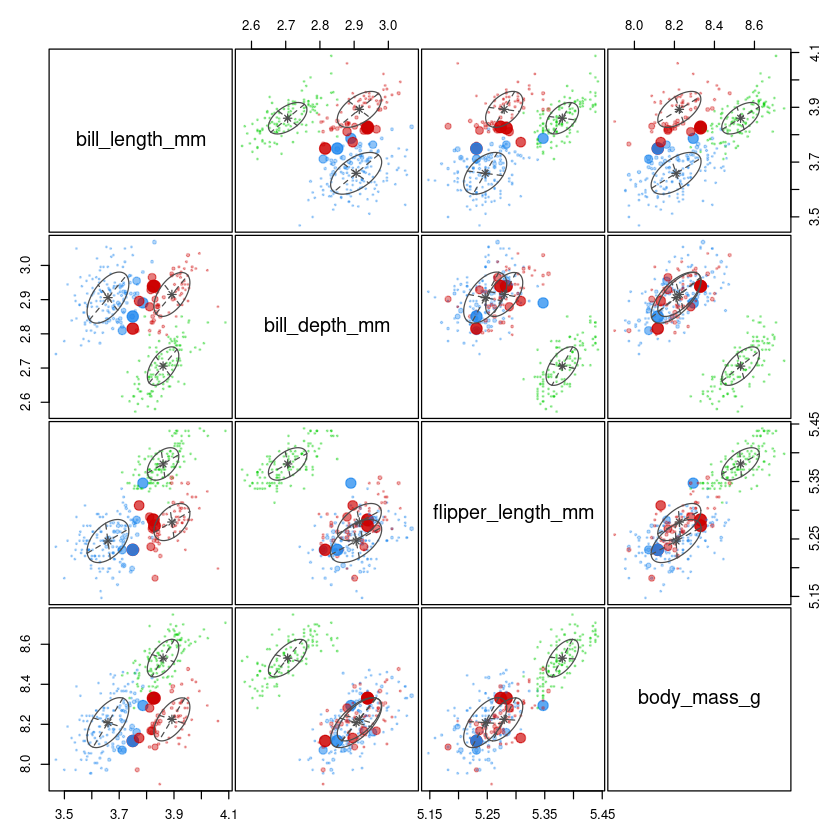

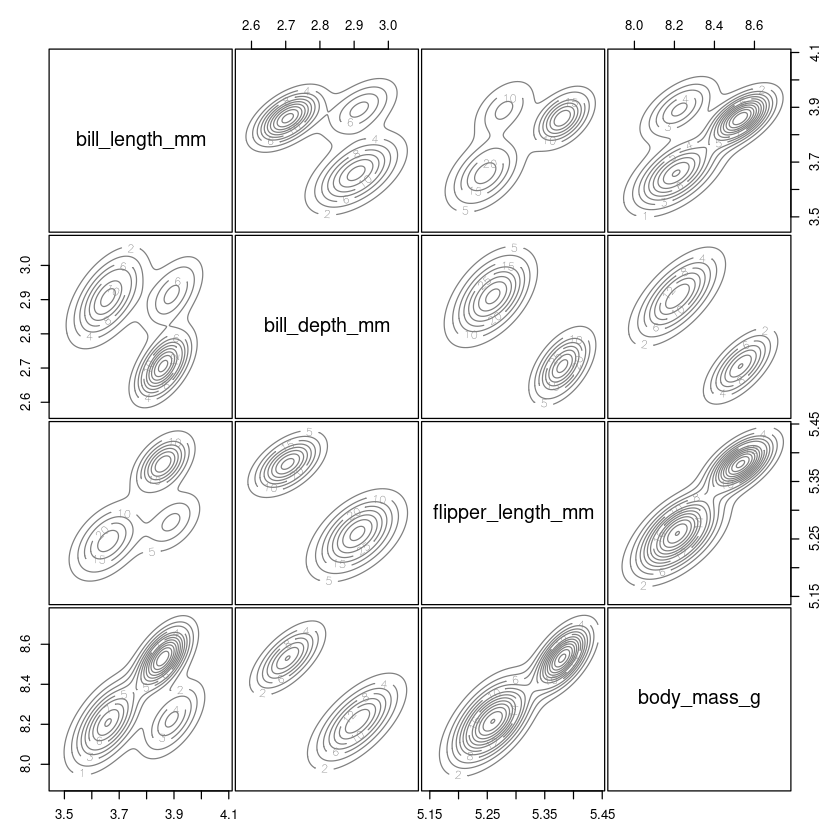

In [141]:
plot(model)

In [140]:
model$parameters$mean

bill_length_mm,3.658987,3.892350,3.860086
bill_depth_mm,2.905884,2.915077,2.705700
flipper_length_mm,5.246380,5.279427,5.380528
body_mass_g,8.208317,8.224554,8.530666


In [138]:
model$parameters$variance$sigma[,,1]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,0.005812448,0.003068850,0.001330780,0.005401785
bill_depth_mm,0.003068850,0.005575420,0.001490256,0.006046031
flipper_length_mm,0.001330780,0.001490256,0.001404773,0.002775775
body_mass_g,0.005401785,0.006046031,0.002775775,0.015592983


In [135]:
labels <- model$classification

labels <- labels %>% as.vector() %>% as.character()
labels <- replace(labels, labels == "1", "Adelie")
labels <- replace(labels, labels == "3", "Gentoo")
labels <- replace(labels, labels == "2", "Chinstrap") %>% as.factor()
as.numeric(labels)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[260] 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1
[297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2

In [136]:
confusionMatrix(labels, reference = logpenguins$species)

Confusion Matrix and Statistics

           Reference
Prediction  Adelie Chinstrap Gentoo
  Adelie       145         3      0
  Chinstrap      1        65      0
  Gentoo         0         0    119

Overall Statistics
                                          
               Accuracy : 0.988           
                 95% CI : (0.9695, 0.9967)
    No Information Rate : 0.4384          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9811          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Adelie Class: Chinstrap Class: Gentoo
Sensitivity                 0.9932           0.9559        1.0000
Specificity                 0.9840           0.9962        1.0000
Pos Pred Value              0.9797           0.9848        1.0000
Neg Pred Value              0.9946           0.9888        1.0000
Prevalence                  0.4384        